In [1]:
import copy
import pylab
import numpy as np
from environment import Env
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
from keras import backend as K

EPISODES = 2500

Using TensorFlow backend.


In [2]:
class ReinforceAgent:
    def __init__(self):
        self.load_model = False
        # 가능한 모든 행동 정의
        self.action_space = [0, 1, 2, 3, 4]
        # 상태와 행동의 크기 정의
        self.action_size = len(self.action_space)
        self.state_size = 15
        self.discount_factor = 0.99 
        self.learning_rate = 0.001

        self.model = self.build_model()
        self.optimizer = self.optimizer()
        self.states, self.actions, self.rewards = [], [], []

        if self.load_model:
            self.model.load_weights('./save_model/reinforce_trained.h5')
    
    # 상태가 입력, 각 행동의 확률이 출력인 인공신경망 생성
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='softmax'))
        model.summary()
        return model
    
    # 정책신경망을 업데이트 하기 위한 오류함수와 훈련함수의 생성
    def optimizer(self):
        action = K.placeholder(shape=[None, 5])
        discounted_rewards = K.placeholder(shape=[None, ])
        
        # 크로스 엔트로피 오류함수 계산
        action_prob = K.sum(action * self.model.output, axis=1)
        cross_entropy = K.log(action_prob) * discounted_rewards
        loss = -K.sum(cross_entropy)
        
        # 정책신경망을 업데이트하는 훈련함수 생성
        optimizer = Adam(lr=self.learning_rate)
        updates = optimizer.get_updates(self.model.trainable_weights,[],
                                        loss)
        train = K.function([self.model.input, action, discounted_rewards], [],
                           updates=updates)

        return train

    # 정책신경망으로 행동 선택
    def get_action(self, state):
        policy = self.model.predict(state)[0]
        return np.random.choice(self.action_size, 1, p=policy)[0]
    
    # 반환값 계산
    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, len(rewards))):
            running_add = running_add * self.discount_factor + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards
    
    # 한 에피소드 동안의 상태, 행동, 보상을 저장
    def append_sample(self, state, action, reward):
        self.states.append(state[0])
        self.rewards.append(reward)
        act = np.zeros(self.action_size)
        act[action] = 1
        self.actions.append(act)

    # 정책신경망 업데이트
    def train_model(self):
        discounted_rewards = np.float32(self.discount_rewards(self.rewards))
        discounted_rewards -= np.mean(discounted_rewards)
        discounted_rewards /= np.std(discounted_rewards)

        self.optimizer([self.states, self.actions, discounted_rewards])
        self.states, self.actions, self.rewards = [], [], []

W0913 15:40:46.539479 13228 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 15:40:46.555469 13228 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 15:40:46.558428 13228 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 15:40:46.600346 13228 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1702: The name tf.log is deprecated. Please use tf.math.log instead.

W0913 15:40:46.660198 13228 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\si

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
Total params: 1,109
Trainable params: 1,109
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: -294.6   time_step: 1476
episode: 1   score: -186.8   time_step: 2504
episode: 2   score: -26.5   time_step: 2649
episode: 3   score: -238.9   time_step: 3858
episode: 4   score: -24.9   time_step: 3977
episode: 5   score: -236.7   time_step: 5114
episode: 6   score: -58.5   time_step: 5419
episode: 7   score: -55.1   time_step: 5730
episode: 8   score: -7.3  

episode: 165   score: -1.1   time_step: 13708
episode: 166   score: -3.8   time_step: 13736
episode: 167   score: -0.4   time_step: 13750
episode: 168   score: -1.4   time_step: 13764
episode: 169   score: -1.1   time_step: 13785
episode: 170   score: -0.7   time_step: 13802
episode: 171   score: -0.5   time_step: 13817
episode: 172   score: -5.1   time_step: 13848
episode: 173   score: -0.3   time_step: 13861
episode: 174   score: -0.6   time_step: 13877
episode: 175   score: -0.5   time_step: 13892
episode: 176   score: -1.2   time_step: 13904
episode: 177   score: -0.4   time_step: 13918
episode: 178   score: -0.3   time_step: 13931
episode: 179   score: -2.5   time_step: 13946
episode: 180   score: -0.5   time_step: 13961
episode: 181   score: -3.3   time_step: 13984
episode: 182   score: -0.4   time_step: 13998
episode: 183   score: -4.1   time_step: 14019
episode: 184   score: -7.5   time_step: 14044
episode: 185   score: -0.6   time_step: 14060
episode: 186   score: -2.4   time_

episode: 344   score: -1.0   time_step: 16544
episode: 345   score: -0.3   time_step: 16557
episode: 346   score: -0.5   time_step: 16572
episode: 347   score: -1.4   time_step: 16586
episode: 348   score: -0.3   time_step: 16599
episode: 349   score: -2.5   time_step: 16614
episode: 350   score: -0.2   time_step: 16626
episode: 351   score: 0.1   time_step: 16635
episode: 352   score: -0.4   time_step: 16649
episode: 353   score: -0.9   time_step: 16658
episode: 354   score: -1.3   time_step: 16671
episode: 355   score: -2.0   time_step: 16691
episode: 356   score: -2.2   time_step: 16703
episode: 357   score: -2.3   time_step: 16716
episode: 358   score: -1.4   time_step: 16730
episode: 359   score: -0.2   time_step: 16742
episode: 360   score: -0.2   time_step: 16754
episode: 361   score: -1.8   time_step: 16772
episode: 362   score: -1.1   time_step: 16783
episode: 363   score: -1.2   time_step: 16795
episode: 364   score: -0.5   time_step: 16810
episode: 365   score: -0.3   time_s

episode: 523   score: -0.3   time_step: 18855
episode: 524   score: -0.3   time_step: 18868
episode: 525   score: -0.7   time_step: 18885
episode: 526   score: -0.9   time_step: 18894
episode: 527   score: -0.3   time_step: 18907
episode: 528   score: -0.9   time_step: 18916
episode: 529   score: -1.2   time_step: 18928
episode: 530   score: -1.1   time_step: 18939
episode: 531   score: -0.4   time_step: 18953
episode: 532   score: -0.9   time_step: 18962
episode: 533   score: 0.1   time_step: 18971
episode: 534   score: -0.9   time_step: 18980
episode: 535   score: -1.1   time_step: 18991
episode: 536   score: -1.5   time_step: 19006
episode: 537   score: -3.3   time_step: 19019
episode: 538   score: -1.2   time_step: 19031
episode: 539   score: -2.1   time_step: 19042
episode: 540   score: -0.3   time_step: 19055
episode: 541   score: -2.3   time_step: 19068
episode: 542   score: 0.0   time_step: 19078
episode: 543   score: -1.1   time_step: 19089
episode: 544   score: -0.8   time_st

episode: 702   score: -0.9   time_step: 20877
episode: 703   score: -0.9   time_step: 20886
episode: 704   score: 0.1   time_step: 20895
episode: 705   score: -0.9   time_step: 20904
episode: 706   score: -0.2   time_step: 20916
episode: 707   score: 0.1   time_step: 20925
episode: 708   score: -0.9   time_step: 20934
episode: 709   score: -1.1   time_step: 20945
episode: 710   score: -1.0   time_step: 20955
episode: 711   score: -0.8   time_step: 20963
episode: 712   score: -1.1   time_step: 20974
episode: 713   score: -1.1   time_step: 20985
episode: 714   score: -0.8   time_step: 20993
episode: 715   score: -0.8   time_step: 21001
episode: 716   score: -0.9   time_step: 21010
episode: 717   score: -1.0   time_step: 21020
episode: 718   score: -0.9   time_step: 21029
episode: 719   score: -2.1   time_step: 21040
episode: 720   score: -3.0   time_step: 21050
episode: 721   score: 0.1   time_step: 21059
episode: 722   score: 0.0   time_step: 21069
episode: 723   score: -1.2   time_step

episode: 881   score: -0.8   time_step: 22583
episode: 882   score: -0.8   time_step: 22591
episode: 883   score: -1.0   time_step: 22601
episode: 884   score: -1.8   time_step: 22609
episode: 885   score: -0.8   time_step: 22617
episode: 886   score: -1.0   time_step: 22627
episode: 887   score: -0.9   time_step: 22636
episode: 888   score: -1.0   time_step: 22646
episode: 889   score: -0.8   time_step: 22654
episode: 890   score: -0.8   time_step: 22662
episode: 891   score: -1.0   time_step: 22672
episode: 892   score: -0.8   time_step: 22680
episode: 893   score: -0.8   time_step: 22688
episode: 894   score: -1.1   time_step: 22699
episode: 895   score: -1.9   time_step: 22708
episode: 896   score: 0.1   time_step: 22717
episode: 897   score: -0.8   time_step: 22725
episode: 898   score: -1.0   time_step: 22735
episode: 899   score: -0.8   time_step: 22743
episode: 900   score: -0.9   time_step: 22752
episode: 901   score: -0.8   time_step: 22760
episode: 902   score: -0.8   time_s

episode: 1059   score: -1.0   time_step: 24292
episode: 1060   score: -1.0   time_step: 24302
episode: 1061   score: -1.0   time_step: 24312
episode: 1062   score: -0.2   time_step: 24324
episode: 1063   score: -1.0   time_step: 24334
episode: 1064   score: -0.8   time_step: 24342
episode: 1065   score: 0.1   time_step: 24351
episode: 1066   score: 0.0   time_step: 24361
episode: 1067   score: -0.8   time_step: 24369
episode: 1068   score: -0.8   time_step: 24377
episode: 1069   score: -0.9   time_step: 24386
episode: 1070   score: -0.8   time_step: 24394
episode: 1071   score: 0.1   time_step: 24403
episode: 1072   score: -0.9   time_step: 24412
episode: 1073   score: -0.8   time_step: 24420
episode: 1074   score: -1.1   time_step: 24431
episode: 1075   score: -0.8   time_step: 24439
episode: 1076   score: -0.8   time_step: 24447
episode: 1077   score: -0.1   time_step: 24458
episode: 1078   score: -1.0   time_step: 24468
episode: 1079   score: -0.8   time_step: 24476
episode: 1080   

episode: 1235   score: 0.1   time_step: 25899
episode: 1236   score: -0.8   time_step: 25907
episode: 1237   score: -0.8   time_step: 25915
episode: 1238   score: -0.9   time_step: 25924
episode: 1239   score: -1.0   time_step: 25934
episode: 1240   score: -1.0   time_step: 25944
episode: 1241   score: -0.8   time_step: 25952
episode: 1242   score: -1.0   time_step: 25962
episode: 1243   score: 0.1   time_step: 25971
episode: 1244   score: 0.0   time_step: 25981
episode: 1245   score: 0.0   time_step: 25991
episode: 1246   score: -0.8   time_step: 25999
episode: 1247   score: -0.8   time_step: 26007
episode: 1248   score: 0.0   time_step: 26017
episode: 1249   score: -0.9   time_step: 26026
episode: 1250   score: -1.0   time_step: 26036
episode: 1251   score: -2.0   time_step: 26046
episode: 1252   score: 0.1   time_step: 26055
episode: 1253   score: -0.8   time_step: 26063
episode: 1254   score: -0.8   time_step: 26071
episode: 1255   score: -0.9   time_step: 26080
episode: 1256   sco

episode: 1411   score: -0.8   time_step: 27457
episode: 1412   score: 0.0   time_step: 27467
episode: 1413   score: 0.0   time_step: 27477
episode: 1414   score: -0.9   time_step: 27486
episode: 1415   score: -1.1   time_step: 27497
episode: 1416   score: 0.0   time_step: 27507
episode: 1417   score: -0.9   time_step: 27516
episode: 1418   score: -0.8   time_step: 27524
episode: 1419   score: -1.1   time_step: 27535
episode: 1420   score: -0.9   time_step: 27544
episode: 1421   score: 0.1   time_step: 27553
episode: 1422   score: 0.0   time_step: 27563
episode: 1423   score: -0.9   time_step: 27572
episode: 1424   score: 0.1   time_step: 27581
episode: 1425   score: 0.0   time_step: 27591
episode: 1426   score: 0.0   time_step: 27601
episode: 1427   score: 0.0   time_step: 27611
episode: 1428   score: -0.9   time_step: 27620
episode: 1429   score: -0.8   time_step: 27628
episode: 1430   score: -0.8   time_step: 27636
episode: 1431   score: -1.0   time_step: 27646
episode: 1432   score:

episode: 1588   score: 0.0   time_step: 29117
episode: 1589   score: -0.9   time_step: 29126
episode: 1590   score: 0.1   time_step: 29135
episode: 1591   score: 0.0   time_step: 29145
episode: 1592   score: 0.0   time_step: 29155
episode: 1593   score: 0.0   time_step: 29165
episode: 1594   score: 0.0   time_step: 29175
episode: 1595   score: -0.9   time_step: 29184
episode: 1596   score: 0.1   time_step: 29193
episode: 1597   score: 0.0   time_step: 29203
episode: 1598   score: 0.0   time_step: 29213
episode: 1599   score: 0.0   time_step: 29223
episode: 1600   score: 0.0   time_step: 29233
episode: 1601   score: -1.1   time_step: 29244
episode: 1602   score: -0.8   time_step: 29252
episode: 1603   score: -0.8   time_step: 29260
episode: 1604   score: 0.1   time_step: 29269
episode: 1605   score: 0.0   time_step: 29279
episode: 1606   score: -0.9   time_step: 29288
episode: 1607   score: 0.1   time_step: 29297
episode: 1608   score: -0.8   time_step: 29305
episode: 1609   score: 0.0 

episode: 1765   score: 0.0   time_step: 30809
episode: 1766   score: 0.0   time_step: 30819
episode: 1767   score: 0.0   time_step: 30829
episode: 1768   score: 0.0   time_step: 30839
episode: 1769   score: 0.0   time_step: 30849
episode: 1770   score: -0.9   time_step: 30858
episode: 1771   score: 0.1   time_step: 30867
episode: 1772   score: 0.0   time_step: 30877
episode: 1773   score: -0.9   time_step: 30886
episode: 1774   score: 0.1   time_step: 30895
episode: 1775   score: 0.0   time_step: 30905
episode: 1776   score: -0.9   time_step: 30914
episode: 1777   score: 0.1   time_step: 30923
episode: 1778   score: 0.0   time_step: 30933
episode: 1779   score: -0.9   time_step: 30942
episode: 1780   score: 0.1   time_step: 30951
episode: 1781   score: 0.0   time_step: 30961
episode: 1782   score: 0.0   time_step: 30971
episode: 1783   score: -0.9   time_step: 30980
episode: 1784   score: 0.1   time_step: 30989
episode: 1785   score: 0.0   time_step: 30999
episode: 1786   score: -0.9  

episode: 1943   score: 0.0   time_step: 32547
episode: 1944   score: 0.0   time_step: 32557
episode: 1945   score: 0.0   time_step: 32567
episode: 1946   score: 0.0   time_step: 32577
episode: 1947   score: 0.0   time_step: 32587
episode: 1948   score: 0.0   time_step: 32597
episode: 1949   score: 0.0   time_step: 32607
episode: 1950   score: 0.0   time_step: 32617
episode: 1951   score: 0.0   time_step: 32627
episode: 1952   score: 0.0   time_step: 32637
episode: 1953   score: 0.0   time_step: 32647
episode: 1954   score: -0.9   time_step: 32656
episode: 1955   score: 0.1   time_step: 32665
episode: 1956   score: 0.0   time_step: 32675
episode: 1957   score: 0.0   time_step: 32685
episode: 1958   score: 0.0   time_step: 32695
episode: 1959   score: -0.9   time_step: 32704
episode: 1960   score: 0.1   time_step: 32713
episode: 1961   score: 0.0   time_step: 32723
episode: 1962   score: 0.0   time_step: 32733
episode: 1963   score: 0.0   time_step: 32743
episode: 1964   score: -0.9   ti

episode: 2121   score: 0.0   time_step: 34303
episode: 2122   score: 0.0   time_step: 34313
episode: 2123   score: 0.0   time_step: 34323
episode: 2124   score: 0.0   time_step: 34333
episode: 2125   score: 0.0   time_step: 34343
episode: 2126   score: 0.0   time_step: 34353
episode: 2127   score: 0.0   time_step: 34363
episode: 2128   score: 0.0   time_step: 34373
episode: 2129   score: 0.0   time_step: 34383
episode: 2130   score: 0.0   time_step: 34393
episode: 2131   score: 0.0   time_step: 34403
episode: 2132   score: 0.0   time_step: 34413
episode: 2133   score: 0.0   time_step: 34423
episode: 2134   score: 0.0   time_step: 34433
episode: 2135   score: 0.0   time_step: 34443
episode: 2136   score: 0.0   time_step: 34453
episode: 2137   score: 0.0   time_step: 34463
episode: 2138   score: 0.0   time_step: 34473
episode: 2139   score: 0.0   time_step: 34483
episode: 2140   score: 0.0   time_step: 34493
episode: 2141   score: 0.0   time_step: 34503
episode: 2142   score: 0.0   time_

episode: 2299   score: 0.0   time_step: 36083
episode: 2300   score: 0.0   time_step: 36093
episode: 2301   score: 0.0   time_step: 36103
episode: 2302   score: 0.0   time_step: 36113
episode: 2303   score: 0.0   time_step: 36123
episode: 2304   score: 0.0   time_step: 36133
episode: 2305   score: 0.0   time_step: 36143
episode: 2306   score: 0.0   time_step: 36153
episode: 2307   score: 0.0   time_step: 36163
episode: 2308   score: 0.0   time_step: 36173
episode: 2309   score: 0.0   time_step: 36183
episode: 2310   score: 0.0   time_step: 36193
episode: 2311   score: 0.0   time_step: 36203
episode: 2312   score: 0.0   time_step: 36213
episode: 2313   score: 0.0   time_step: 36223
episode: 2314   score: 0.0   time_step: 36233
episode: 2315   score: -2.9   time_step: 36252
episode: 2316   score: 0.1   time_step: 36261
episode: 2317   score: 0.0   time_step: 36271
episode: 2318   score: 0.0   time_step: 36281
episode: 2319   score: 0.0   time_step: 36291
episode: 2320   score: 0.0   time

episode: 2477   score: 0.0   time_step: 37865
episode: 2478   score: 0.0   time_step: 37875
episode: 2479   score: 0.0   time_step: 37885
episode: 2480   score: 0.0   time_step: 37895
episode: 2481   score: 0.0   time_step: 37905
episode: 2482   score: 0.0   time_step: 37915
episode: 2483   score: 0.0   time_step: 37925
episode: 2484   score: 0.0   time_step: 37935
episode: 2485   score: 0.0   time_step: 37945
episode: 2486   score: 0.0   time_step: 37955
episode: 2487   score: 0.0   time_step: 37965
episode: 2488   score: 0.0   time_step: 37975
episode: 2489   score: 0.0   time_step: 37985
episode: 2490   score: -0.9   time_step: 37994
episode: 2491   score: 0.1   time_step: 38003
episode: 2492   score: 0.0   time_step: 38013
episode: 2493   score: 0.0   time_step: 38023
episode: 2494   score: 0.0   time_step: 38033
episode: 2495   score: 0.0   time_step: 38043
episode: 2496   score: 0.0   time_step: 38053
episode: 2497   score: 0.0   time_step: 38063
episode: 2498   score: 0.0   time

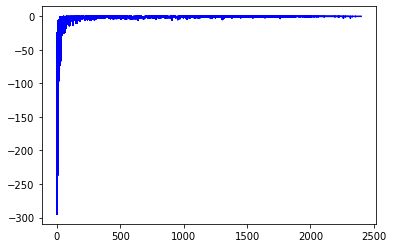

In [3]:
if __name__ == "__main__":
    # 환경과 에이전트의 생성
    env = Env()
    agent = ReinforceAgent()

    global_step = 0
    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        # env 초기화
        state = env.reset()
        state = np.reshape(state, [1, 15])

        while not done:
            global_step += 1
            # 현재 상태에 대한 행동 선택
            action = agent.get_action(state)
            # 선택한 행동으로 환경에서 한 타임스탭 진행 후 샘플 수집
            next_state, reward, done = env.step(action)
            next_state = np.reshape(next_state, [1, 15])

            agent.append_sample(state, action, reward)
            score += reward
            state = copy.deepcopy(next_state)

            if done:
                # 에피소드마다 정책신경망 업데이트
                agent.train_model()
                scores.append(score)
                episodes.append(e)
                score = round(score,2)
                print("episode:", e, "  score:", score, "  time_step:",
                      global_step)

        # 100 에피소드마다 학습 결과 출력 및 모델 저장
        if e % 100 == 0:
            pylab.plot(episodes, scores, 'b')
            pylab.savefig("./graph/reinforce_"+str(e)+".png")
            agent.model.save_weights("./model/reinforce_"+str(e)+".h5")